# Task 3: Image Classification

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## Dataset

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) 
])

In [3]:
train_dataset = datasets.MNIST(root='./datasets', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./datasets', train=False, transform=transform, download=True)

In [4]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

### Visualizaton

In [5]:
sample = next(iter(train_loader))

img_batch = sample[0].reshape(8, 8, 1, 28, 28)
label_batch = sample[1].reshape(8, 8)

img_batch.shape, label_batch.shape

(torch.Size([8, 8, 1, 28, 28]), torch.Size([8, 8]))

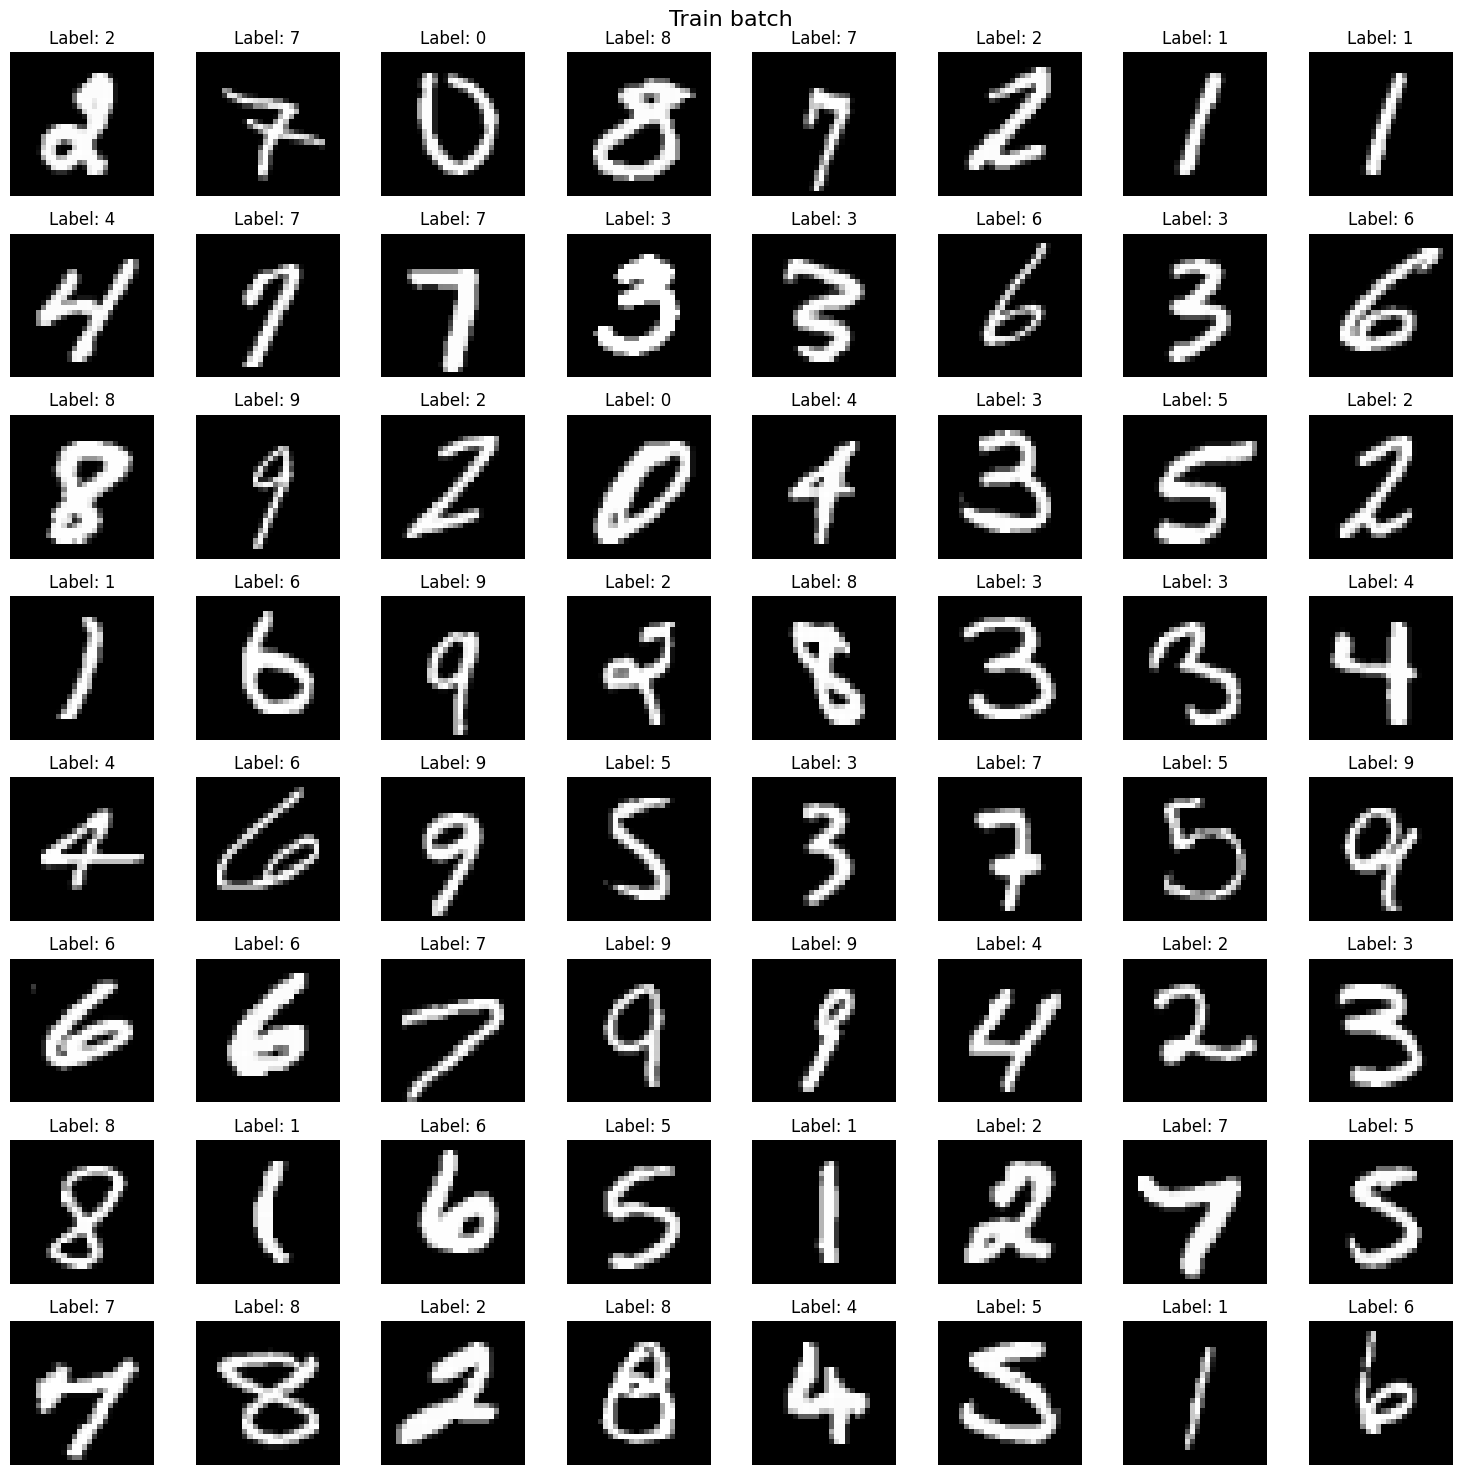

In [6]:
import matplotlib.pyplot as plt

rows = 8
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(img_batch[i, j].permute(1, 2, 0), cmap='gray')
        axes[i, j].set_title("Label: " + str(label_batch[i, j].item()))
        axes[i, j].axis('off')

fig.suptitle("Train batch", fontsize=16)
plt.tight_layout()

In [7]:
for images, labels in train_loader:
    print("Image shape:", images.shape)
    print("Labels shape:", labels.shape)
    break

Image shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


## Model

In [8]:
import torch.nn as nn
import torch.optim as optim

In [9]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.fc(x)

In [10]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [11]:
from tqdm import tqdm

epochs = 20

train_losses = []
val_accuracies = []

for epoch in range(epochs):

    model.train()

    epoch_train_loss = 0.0

    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}', unit='batch') as pbar:
        for images, labels in pbar:

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            pbar.set_postfix(loss=loss.item())

            epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * (correct / total)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/2], Train Loss: {avg_train_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Epoch 1/20: 100%|██████████| 938/938 [00:09<00:00, 95.15batch/s, loss=0.165]


Epoch [1/2], Train Loss: 0.7353, Validation Accuracy: 89.32%


Epoch 2/20: 100%|██████████| 938/938 [00:10<00:00, 87.02batch/s, loss=0.258]


Epoch [2/2], Train Loss: 0.3636, Validation Accuracy: 91.08%


Epoch 3/20: 100%|██████████| 938/938 [00:10<00:00, 86.27batch/s, loss=0.122]


Epoch [3/2], Train Loss: 0.3185, Validation Accuracy: 91.79%


Epoch 4/20: 100%|██████████| 938/938 [00:10<00:00, 87.52batch/s, loss=0.364] 


Epoch [4/2], Train Loss: 0.2918, Validation Accuracy: 92.25%


Epoch 5/20: 100%|██████████| 938/938 [00:10<00:00, 87.99batch/s, loss=0.271] 


Epoch [5/2], Train Loss: 0.2705, Validation Accuracy: 92.69%


Epoch 6/20: 100%|██████████| 938/938 [00:10<00:00, 86.70batch/s, loss=0.287] 


Epoch [6/2], Train Loss: 0.2514, Validation Accuracy: 93.28%


Epoch 7/20: 100%|██████████| 938/938 [00:10<00:00, 88.51batch/s, loss=0.26]  


Epoch [7/2], Train Loss: 0.2345, Validation Accuracy: 93.66%


Epoch 8/20: 100%|██████████| 938/938 [00:10<00:00, 89.42batch/s, loss=0.149] 


Epoch [8/2], Train Loss: 0.2188, Validation Accuracy: 93.80%


Epoch 9/20: 100%|██████████| 938/938 [00:10<00:00, 89.31batch/s, loss=0.631] 


Epoch [9/2], Train Loss: 0.2049, Validation Accuracy: 94.43%


Epoch 10/20: 100%|██████████| 938/938 [00:11<00:00, 84.80batch/s, loss=0.0964]


Epoch [10/2], Train Loss: 0.1921, Validation Accuracy: 94.48%


Epoch 11/20: 100%|██████████| 938/938 [00:11<00:00, 84.97batch/s, loss=0.309] 


Epoch [11/2], Train Loss: 0.1810, Validation Accuracy: 95.05%


Epoch 12/20: 100%|██████████| 938/938 [00:10<00:00, 85.89batch/s, loss=0.169] 


Epoch [12/2], Train Loss: 0.1707, Validation Accuracy: 95.28%


Epoch 13/20: 100%|██████████| 938/938 [00:10<00:00, 90.64batch/s, loss=0.126] 


Epoch [13/2], Train Loss: 0.1622, Validation Accuracy: 95.44%


Epoch 14/20: 100%|██████████| 938/938 [00:10<00:00, 89.99batch/s, loss=0.24]  


Epoch [14/2], Train Loss: 0.1540, Validation Accuracy: 95.32%


Epoch 15/20: 100%|██████████| 938/938 [00:10<00:00, 90.95batch/s, loss=0.176] 


Epoch [15/2], Train Loss: 0.1470, Validation Accuracy: 95.80%


Epoch 16/20: 100%|██████████| 938/938 [00:10<00:00, 87.36batch/s, loss=0.212] 


Epoch [16/2], Train Loss: 0.1399, Validation Accuracy: 95.98%


Epoch 17/20: 100%|██████████| 938/938 [00:10<00:00, 86.53batch/s, loss=0.0464]


Epoch [17/2], Train Loss: 0.1339, Validation Accuracy: 96.01%


Epoch 18/20: 100%|██████████| 938/938 [00:10<00:00, 90.15batch/s, loss=0.068] 


Epoch [18/2], Train Loss: 0.1284, Validation Accuracy: 96.26%


Epoch 19/20: 100%|██████████| 938/938 [00:11<00:00, 84.77batch/s, loss=0.226] 


Epoch [19/2], Train Loss: 0.1231, Validation Accuracy: 96.25%


Epoch 20/20: 100%|██████████| 938/938 [00:11<00:00, 84.61batch/s, loss=0.095] 


Epoch [20/2], Train Loss: 0.1185, Validation Accuracy: 96.45%


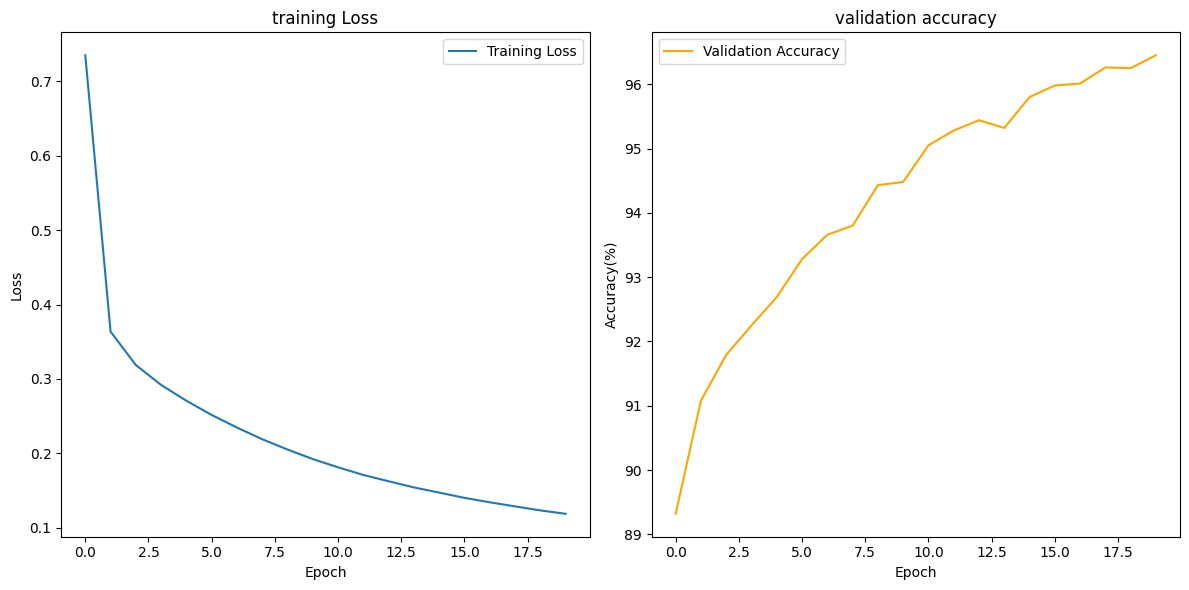

In [14]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('training Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.title('validation accuracy')
plt.legend()

plt.tight_layout()
plt.show()